1146_4351974-0_20170220_OCT_00014209.bmp_superficial.jpg [37.71113916]
157_1425598-2_20170809_OCT_00005655.bmp_superficial.jpg [35.00359692]
101_1296950-5_20160815_OCT_00001009.bmp_superficial.jpg [45.68723376]
1322_805250-4_20170124_OCT_00002857.bmp_superficial.jpg [66.61562866]
903_4048777-2_20171107_OCT_00004070.bmp_superficial.jpg [46.54926687]
112_1296950-5_20171120_OCT_00000948.bmp_superficial.jpg [62.73888916]
1062_4256802-5_20170918_OCT_00009105.bmp_superficial.jpg [59.97402569]
1328_805250-4_20170905_OCT_00002684.bmp_superficial.jpg [60.24096991]
90_1252430-0_20170516_OCT_00000499.bmp_superficial.jpg [39.94879444]
942_4125708-3_20161215_OCT_00001828.bmp_superficial.jpg [37.91315307]
309_2070791-9_20160614_OCT_00000844.bmp_superficial.jpg [39.43128245]
923_4094106-8_20171003_OCT_00000351.bmp_superficial.jpg [49.0070791]
633_3389614-9_20170731_OCT_00001027.bmp_superficial.jpg [42.15410477]
1295_453862-9_20180306_OCT_00000225.bmp_superficial.jpg [55.35093001]
1130_4328468-0_20170

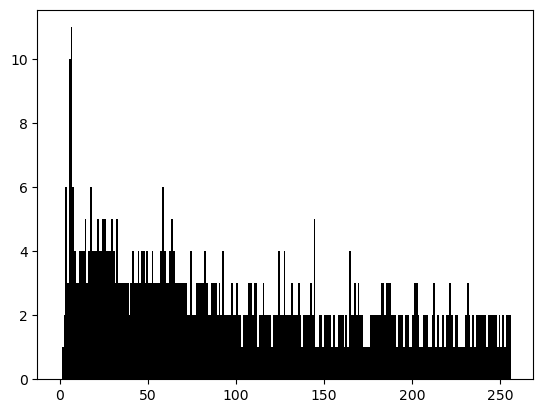

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# 設置圖像目錄
image_dir = r"/home/charlie/projects/entropy/raw/Raw_superficial/reactive/inactive"

# 初始化總面積
results = {}

# 列出目錄中的所有文件
for filename in os.listdir(image_dir):
    # 檢查文件是否為圖像
    if not (filename.endswith(".bmp") or filename.endswith(".jpg")):
        continue

    # 組合文件路徑
    filepath = os.path.join(image_dir, filename)
    
    # 讀取圖像
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    #計算直方圖
    histi = cv2.calcHist([img], [0], None, [256], [0, 256])
    #print(hist)
    weight = np.arange(0,256)
    plt.hist(histi.ravel(), 256, [0, 256], color = 'black')
    plt.savefig('/home/charlie/projects/entropy/test/hist/raw/reactive/inactive/'+ filename)
    
    sum = 0
    for i in range(256):
        histii = histi[i] * weight[i]
        sum += histii
        
        
    print(filename, sum/(img.shape[0]*img.shape[1]))
    
     #進行高斯平滑
    kernel_size = 3
    y = cv2.GaussianBlur(img,(kernel_size, kernel_size), 0)
    
    # 使用 Canny 邊緣檢測算法檢測血管
    edges = cv2.Canny(y, 50, 150)
    
    #cv2.imwrite("/home/charlie/projects/entropy/test/hist/raw/reactive/"+ filename, hist)
    cv2.imwrite("/home/charlie/projects/entropy/test/canny/raw/reactive/inactive/"+ filename, edges)
    